<a href="https://colab.research.google.com/github/judex22/ProjectDSc/blob/main/Who_is_the_Next_Harry_KANE%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WHO IS THE NEXT HARRY KANE?**

The project aims to find similar players to Harry Kane based on attributes from the Premier League data of the 2020/21 season obtained from the FBref website.
[Link to Website.](https://fbref.com/en/comps/9/10728/stats/2020-2021-Premier-League-Stats)

##Two approaches are used for the analysis:
*   Comparison of Harry Kane with other Players using Radar Plots.

*   Recommendation System to find similar players to Harry Kane using the K-Nearest Neighbor(KNN) Technique.





In [ ]:
#import required libraries
import io
import pandas as pd
import numpy as np
from copy import deepcopy
from google.colab import files

#import libraries for plotting
import plotly.express as px


###     Read and Explore Data



In [ ]:
uploaded=files.upload()

Saving epl_general.xlsx to epl_general.xlsx
Saving epl_other.xlsx to epl_other.xlsx
Saving epl_possesion.xlsx to epl_possesion.xlsx
Saving epl_shooting.xlsx to epl_shooting.xlsx


In [ ]:
gen_df=pd.read_excel(io.BytesIO(uploaded['epl_general.xlsx']))
shoot_df=pd.read_excel(io.BytesIO(uploaded['epl_shooting.xlsx']))
poss_df=pd.read_excel(io.BytesIO(uploaded['epl_possesion.xlsx']))
other_df=pd.read_excel(io.BytesIO(uploaded['epl_other.xlsx']))

In [ ]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rk             532 non-null    int64  
 1   Player         532 non-null    object 
 2   Nation         532 non-null    object 
 3   Pos            532 non-null    object 
 4   Squad          532 non-null    object 
 5   Age            532 non-null    int64  
 6   Born           532 non-null    int64  
 7   MP             532 non-null    int64  
 8   Starts         532 non-null    int64  
 9   Min            532 non-null    int64  
 10  90s            532 non-null    float64
 11  Gls            532 non-null    int64  
 12  Ast            532 non-null    int64  
 13  G-PK           532 non-null    int64  
 14  PK             532 non-null    int64  
 15  PKatt          532 non-null    int64  
 16  CrdY           532 non-null    int64  
 17  CrdR           532 non-null    int64  
 18  Gls_per90 

In [ ]:
gen_new=gen_df[["Rk","Player","Pos","Age","Min","Gls","Ast","Ast_per90","Gls_per90"]]  #Obtain only required columns for General Player Statistics

In [ ]:
shoot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       532 non-null    int64  
 1   Player   532 non-null    object 
 2   Nation   532 non-null    object 
 3   Pos      532 non-null    object 
 4   Squad    532 non-null    object 
 5   Age      532 non-null    int64  
 6   Born     532 non-null    int64  
 7   90s      532 non-null    float64
 8   Gls      532 non-null    int64  
 9   Sh       532 non-null    int64  
 10  SoT      532 non-null    int64  
 11  SoT%     435 non-null    float64
 12  Sh/90    532 non-null    float64
 13  SoT/90   532 non-null    float64
 14  G/Sh     435 non-null    float64
 15  G/SoT    373 non-null    float64
 16  Dist     435 non-null    float64
 17  FK       532 non-null    int64  
 18  PK       532 non-null    int64  
 19  PKatt    532 non-null    int64  
 20  xG       532 non-null    float64
 21  npxG     532 non

In [ ]:
shoot_new=shoot_df[["Rk","Sh/90","SoT/90","G/Sh","G/SoT"]]    #Obtain only required columns of  Player Shooting Statistics

In [ ]:
poss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rk                   532 non-null    int64  
 1   Player               532 non-null    object 
 2   Nation               532 non-null    object 
 3   Pos                  532 non-null    object 
 4   Squad                532 non-null    object 
 5   Age                  532 non-null    int64  
 6   Born                 532 non-null    int64  
 7   90s                  532 non-null    float64
 8   Total_Touches        532 non-null    int64  
 9   Touches_Def Pen      532 non-null    int64  
 10  Def 3rd              532 non-null    int64  
 11  Touches_Mid 3rd      532 non-null    int64  
 12  Touches_Att 3rd      532 non-null    int64  
 13  Touches_Att Pen      532 non-null    int64  
 14  Touches_Live         532 non-null    int64  
 15  Dribbles_Succ        532 non-null    int

In [ ]:
poss_new=poss_df[["Rk","Touches_Att 3rd","Touches_Att Pen","Dribbles_Succ"]]      #Obtain only required columns of  Player Possesion Statistics

In [ ]:
other_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rk                532 non-null    int64  
 1   Player            532 non-null    object 
 2   Nation            532 non-null    object 
 3   Pos               532 non-null    object 
 4   Squad             532 non-null    object 
 5   Age               532 non-null    int64  
 6   Born              532 non-null    int64  
 7   90s               532 non-null    float64
 8   CrdY              532 non-null    int64  
 9   CrdR              532 non-null    int64  
 10  2CrdY             532 non-null    int64  
 11  Fls               532 non-null    int64  
 12  Fld               532 non-null    int64  
 13  Off               532 non-null    int64  
 14  Crs               532 non-null    int64  
 15  Int               532 non-null    int64  
 16  TklW              532 non-null    int64  
 1

In [ ]:
other_new=other_df[["Rk","AerialDuels_Won"]]    #Obtain only required columns of  Other Player Statistics



###   Merging and Cleaning Dataframes




In [ ]:
from functools import reduce
df=[gen_new,shoot_new,poss_new,other_new]                                                  # merging datasets
merge_df=reduce(lambda left,right: pd.merge(left,right, on=['Rk'], how='outer'),df)
merge_df

,Rk,Player,Pos,Age,Min,Gls,Ast,Ast_per90,Gls_per90,Sh/90,SoT/90,G/Sh,G/SoT,Touches_Att 3rd,Touches_Att Pen,Dribbles_Succ,AerialDuels_Won
0,1,Patrick van Aanholt\Patrick-van-Aanholt,DF,29,1777,0,1,0.05,0.00,0.91,0.30,0.00,0.00,344,38,9,10
1,2,Tammy Abraham\Tammy-Abraham,FW,22,1040,6,1,0.09,0.52,2.77,1.13,0.19,0.46,166,66,6,39
2,3,Che Adams\Che-Adams,FW,24,2667,9,5,0.17,0.30,1.89,1.05,0.16,0.29,492,110,25,47
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,DF,22,2953,0,0,0.00,0.00,0.61,0.15,0.00,0.00,73,34,8,100
4,5,Adrián\Adrian,GK,33,270,0,0,0.00,0.00,0.00,0.00,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,528,Andi Zeqiri\Andi-Zeqiri,FWDF,21,171,0,0,0.00,0.00,3.68,1.05,0.00,0.00,37,15,1,2
528,529,Oleksandr Zinchenko\Oleksandr-Zinchenko,DF,23,1478,0,0,0.00,0.00,0.97,0.24,0.00,0.00,444,10,5,24
529,530,Hakim Ziyech\Hakim-Ziyech,FWMF,27,1172,2,3,0.23,0.15,2.69,0.92,0.06,0.17,443,37,18,3
530,531,Kurt Zouma\Kurt-Zouma,DF,25,2029,5,0,0.00,0.22,1.20,0.53,0.19,0.42,75,31,5,97



> For Analysis,the 2nd preferred position is removed under the 'Pos' Column keeping only the 1st position as the main role.

> For example 'FWMF' consists of both Forward(FW) as well as Midfielder(MF) positions.The latter characters are deleted to obtain only the former part as the main position for the player concerned.

> Also the first instance before the '\' symbol is kept for the 'Player' column.


---







In [ ]:
for i in range(len(merge_df)):
  merge_df['Pos'][i]=merge_df['Pos'][i][:2]                               #removing the 2nd playing position of player
  merge_df['Player'][i]= "".join(merge_df['Player'][i].split("\\")[:-1])  #delete the player name after '\' symbol.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
merge_df[["G/Sh","G/SoT"]]=merge_df[["G/Sh","G/SoT"]].replace(np.nan,0)           #replacing NULL values with zero

In [ ]:
#insert per90 stats columns of required attributes

add_Per90=["Touches_Att 3rd","Touches_Att Pen","Dribbles_Succ","AerialDuels_Won"]       # columns to be added

for col in add_Per90:
  merge_df[col + "_Per90"]=merge_df[col].divide(merge_df['Min']).multiply(90).round(2)    # merge column to dataset and calculate Per90 stats

> The following are all the Attributes which will be used for further Analysis.

*   Pos-->Position
*   Min--> Total Minutes Played
*   Gls-->Total Goals Scored
*   Ast-->Total Assists
*   Gls_per90-->Goals scored per match
*   Ast-->Assists per match
*   Sh/90-->Shots per match
*   SoT/90-->Shots on Target per match
*   G/Sh-->Goals per Shot
*   G/SoT-->Goals per Shot on Target
*   Touches_Att 3rd-->Touches taken in the Attacking 3rd of the pitch
*   Touches_Att Pen-->Touches taken inside the Attacking Penalty box
*   Dribbles_Succ-->Successful Dribbles completed.
*   AerialDuels_Won-->Aerial Battles won













In [ ]:
epl=merge_df
epl

,Rk,Player,Pos,Age,Min,Gls,Ast,Ast_per90,Gls_per90,Sh/90,SoT/90,G/Sh,G/SoT,Touches_Att 3rd,Touches_Att Pen,Dribbles_Succ,AerialDuels_Won,Touches_Att 3rd_Per90,Touches_Att Pen_Per90,Dribbles_Succ_Per90,AerialDuels_Won_Per90
0,1,Patrick van Aanholt,DF,29,1777,0,1,0.05,0.00,0.91,0.30,0.00,0.00,344,38,9,10,17.42,1.92,0.46,0.51
1,2,Tammy Abraham,FW,22,1040,6,1,0.09,0.52,2.77,1.13,0.19,0.46,166,66,6,39,14.37,5.71,0.52,3.38
2,3,Che Adams,FW,24,2667,9,5,0.17,0.30,1.89,1.05,0.16,0.29,492,110,25,47,16.60,3.71,0.84,1.59
3,4,Tosin Adarabioyo,DF,22,2953,0,0,0.00,0.00,0.61,0.15,0.00,0.00,73,34,8,100,2.22,1.04,0.24,3.05
4,5,Adrián,GK,33,270,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,528,Andi Zeqiri,FW,21,171,0,0,0.00,0.00,3.68,1.05,0.00,0.00,37,15,1,2,19.47,7.89,0.53,1.05
528,529,Oleksandr Zinchenko,DF,23,1478,0,0,0.00,0.00,0.97,0.24,0.00,0.00,444,10,5,24,27.04,0.61,0.30,1.46
529,530,Hakim Ziyech,FW,27,1172,2,3,0.23,0.15,2.69,0.92,0.06,0.17,443,37,18,3,34.02,2.84,1.38,0.23
530,531,Kurt Zouma,DF,25,2029,5,0,0.00,0.22,1.20,0.53,0.19,0.42,75,31,5,97,3.33,1.38,0.22,4.30


In [ ]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 531
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rk                     532 non-null    int64  
 1   Player                 532 non-null    object 
 2   Pos                    532 non-null    object 
 3   Age                    532 non-null    int64  
 4   Min                    532 non-null    int64  
 5   Gls                    532 non-null    int64  
 6   Ast                    532 non-null    int64  
 7   Ast_per90              532 non-null    float64
 8   Gls_per90              532 non-null    float64
 9   Sh/90                  532 non-null    float64
 10  SoT/90                 532 non-null    float64
 11  G/Sh                   532 non-null    float64
 12  G/SoT                  532 non-null    float64
 13  Touches_Att 3rd        532 non-null    int64  
 14  Touches_Att Pen        532 non-null    int64  
 15  Dribbl

In [ ]:
epl.describe().round(2)       # summary statistics of the epl dataset

,Rk,Age,Min,Gls,Ast,Ast_per90,Gls_per90,Sh/90,SoT/90,G/Sh,G/SoT,Touches_Att 3rd,Touches_Att Pen,Dribbles_Succ,AerialDuels_Won,Touches_Att 3rd_Per90,Touches_Att Pen_Per90,Dribbles_Succ_Per90,AerialDuels_Won_Per90
count,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00
mean,266.50,25.50,1411.44,1.85,1.29,0.07,0.10,1.10,0.36,0.07,0.18,230.70,33.66,13.94,24.65,16.33,2.31,0.91,1.58
std,153.72,4.32,1043.17,3.34,2.10,0.11,0.16,1.15,0.62,0.10,0.24,254.00,44.92,17.97,32.10,19.50,2.90,1.56,2.05
min,1.00,16.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,133.75,22.00,426.00,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,25.75,3.00,1.00,3.00,5.27,0.56,0.12,0.44
50%,266.50,26.00,1345.00,1.00,0.00,0.00,0.03,0.73,0.18,0.00,0.00,138.50,17.00,7.00,13.00,15.82,1.48,0.60,1.11
75%,399.25,29.00,2303.50,2.00,2.00,0.11,0.13,1.73,0.53,0.11,0.33,371.00,45.25,20.00,34.00,22.60,3.36,1.34,2.18
max,532.00,38.00,3420.00,23.00,14.00,0.87,1.08,10.00,10.00,1.00,1.00,1339.00,313.00,160.00,228.00,360.00,30.00,30.00,30.00



###   Data Slicing



In [ ]:
epl[(epl['Min']>=1400)&(epl['Pos']=="FW")].shape        #Acquiring only epl Forwards data

(54, 21)



*   Only Forwards of EPL 2020/21 season are taken into consideration for Analysis since we are comparing similarity between forwards position
*   Forwards who played more or equal to the average minutes(i:e 1400) played by players overall are considered.



In [ ]:
epl_fw=deepcopy(epl[(epl['Min']>=1400)&(epl['Pos']=="FW")])       # Slicing data for only forwards who played at least 1400 minutes of football
epl_fw.reset_index(drop=True,inplace=True)
final_data=epl_fw                                             #Store dataset for ML Analysis
epl_fw.head(49)

,Rk,Player,Pos,Age,Min,Gls,Ast,Ast_per90,Gls_per90,Sh/90,SoT/90,G/Sh,G/SoT,Touches_Att 3rd,Touches_Att Pen,Dribbles_Succ,AerialDuels_Won,Touches_Att 3rd_Per90,Touches_Att Pen_Per90,Dribbles_Succ_Per90,AerialDuels_Won_Per90
0,3,Che Adams,FW,24,2667,9,5,0.17,0.30,1.89,1.05,0.16,0.29,492,110,25,47,16.60,3.71,0.84,1.59
1,28,Michail Antonio,FW,30,1974,10,5,0.23,0.46,2.92,1.05,0.16,0.43,480,130,47,63,21.88,5.93,2.14,2.87
2,32,Pierre-Emerick Aubameyang,FW,31,2332,10,3,0.12,0.39,2.16,0.73,0.14,0.42,471,126,12,31,18.18,4.86,0.46,1.20
3,35,Jordan Ayew,FW,28,2096,1,3,0.13,0.04,1.07,0.47,0.04,0.09,420,63,45,31,18.03,2.71,1.93,1.33
4,42,Patrick Bamford,FW,26,3050,17,7,0.21,0.50,3.10,1.33,0.14,0.33,408,183,17,54,12.04,5.40,0.50,1.59
5,47,Harvey Barnes,FW,22,1945,9,4,0.19,0.42,2.54,1.16,0.16,0.36,516,109,28,22,23.88,5.04,1.30,1.02
6,56,Christian Benteke,FW,29,1816,10,1,0.05,0.50,3.52,1.64,0.14,0.30,360,127,16,212,17.84,6.29,0.79,10.51
7,67,Jarrod Bowen,FW,23,2562,8,5,0.18,0.28,1.93,0.56,0.15,0.50,579,120,40,20,20.34,4.22,1.41,0.70
8,82,Dominic Calvert-Lewin,FW,23,2871,16,0,0.00,0.50,2.54,1.44,0.20,0.35,545,156,20,143,17.08,4.89,0.63,4.48
9,92,Ivan Cavaleiro,FW,26,2472,3,0,0.00,0.11,1.67,0.58,0.04,0.13,620,92,52,46,22.57,3.35,1.89,1.67


In [ ]:
#Finding Harry Kane 'Rk' id
epl_fw[epl_fw['Player'].str.contains("Kane")]

,Rk,Player,Pos,Age,Min,Gls,Ast,Ast_per90,Gls_per90,Sh/90,SoT/90,G/Sh,G/SoT,Touches_Att 3rd,Touches_Att Pen,Dribbles_Succ,AerialDuels_Won,Touches_Att 3rd_Per90,Touches_Att Pen_Per90,Dribbles_Succ_Per90,AerialDuels_Won_Per90
22,236,Harry Kane,FW,27,3082,23,14,0.41,0.67,3.91,1.37,0.14,0.4,616,166,46,90,17.99,4.85,1.34,2.63


# Minutes Played By Forwards In The EPL 2020/21 Season

In [ ]:
#Bar Plot of Minutes played by Forwards who played more than average time
fw_min=epl_fw[["Player","Min"]]
fig=px.bar(fw_min,x="Player",y="Min",text="Min",title="Minutes Played By Forwards in EPL 2020/21 Season")
fig.update_xaxes(tickangle=70)

> From the above bar plot, Ollie Watkins, Son Heung-Min, Harry Kane, Mohamed Salah and Patrick Bamford are the forwards that played the most minutes during the EPL 2020/21 season whereas Aleksandar Mitrovic and Willian had the least playing time satisfying the 1400 minutes threshold.

# Harry Kane Statistics

In [ ]:
#Harry Kane Stats
stat_per90=["Ast_per90","Gls_per90","Sh/90","SoT/90","G/SoT","Touches_Att 3rd_Per90","Touches_Att Pen_Per90","Dribbles_Succ_Per90","AerialDuels_Won_Per90"]
epl_fw.loc[(epl_fw["Rk"]== 236), stat_per90].sum()

Ast_per90                 0.41
Gls_per90                 0.67
Sh/90                     3.91
SoT/90                    1.37
G/SoT                     0.40
Touches_Att 3rd_Per90    17.99
Touches_Att Pen_Per90     4.85
Dribbles_Succ_Per90       1.34
AerialDuels_Won_Per90     2.63
dtype: float64

In [ ]:
#Harry Kane Radar Plot
fig2=px.line_polar(epl_fw,r=epl_fw.loc[(epl_fw["Rk"]== 236), stat_per90].sum(),
                   theta=stat_per90 ,line_close=True)
fig2.update_traces(fill='toself')
fig2.show()


##   Normalize Values


> As can be seen from the above Radar Plot Visualization, not a lot of information can be retrieved as the data values have different scales in each column. Normalization is done to get all the attributes to the same scale for better Analysis.








In [ ]:
#Normalization Dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

epl_fw[stat_per90]= sc.fit_transform(epl_fw[stat_per90])

In [ ]:
epl_fw[stat_per90].max()

Ast_per90                1.0
Gls_per90                1.0
Sh/90                    1.0
SoT/90                   1.0
G/SoT                    1.0
Touches_Att 3rd_Per90    1.0
Touches_Att Pen_Per90    1.0
Dribbles_Succ_Per90      1.0
AerialDuels_Won_Per90    1.0
dtype: float64

In [ ]:
epl_fw[epl_fw["Rk"]==236]     #Normalized Harry Kane Per90 Statistics

,Rk,Player,Pos,Age,Min,Gls,Ast,Ast_per90,Gls_per90,Sh/90,SoT/90,G/Sh,G/SoT,Touches_Att 3rd,Touches_Att Pen,Dribbles_Succ,AerialDuels_Won,Touches_Att 3rd_Per90,Touches_Att Pen_Per90,Dribbles_Succ_Per90,AerialDuels_Won_Per90
22,236,Harry Kane,FW,27,3082,23,14,1.0,0.9,1.0,0.815068,0.14,0.659574,616,166,46,90,0.209433,0.415761,0.181637,0.237173


In [ ]:
#Normalized Plot for Harry Kane
fig3=px.line_polar(epl_fw,r=epl_fw.loc[(epl_fw["Rk"]== 236), stat_per90].sum(),
                   theta=stat_per90 ,title="Harry Kane",line_close=True)
fig3.update_traces(fill='toself')
fig3.show()

> The above plot is a better visualization which will allow to compare each player to Harry Kane based on each attribute.




#1) METHOD I: PLAYER COMPARISONS USING RADAR PLOTS



In [ ]:
import plotly.graph_objects as go

for i,row in epl_fw.iterrows():
  if row["Rk"]==236:
    continue

  print(row["Player"])

  fig4=go.Figure()

  fig4.add_trace(go.Scatterpolar(r=epl_fw.loc[(epl_fw["Rk"]== 236), stat_per90].sum(),
                   theta=stat_per90 ,name="Harry Kane",fill='toself'))

  fig4.add_trace(go.Scatterpolar(r=epl_fw.loc[(epl_fw["Rk"]== row["Rk"]), stat_per90].sum(),
                   theta=stat_per90 ,name=row["Player"],fill='toself'))

  fig4.update_layout(title="Harry Kane vs "+row["Player"], polar=dict(radialaxis= dict(visible=True, range=[0,epl_max])), showlegend=True)

  fig4.show()

Che Adams


Michail Antonio


Pierre-Emerick Aubameyang


Jordan Ayew


Patrick Bamford


Harvey Barnes


Christian Benteke


Jarrod Bowen


Dominic Calvert-Lewin


Ivan Cavaleiro


Roberto Firmino


Phil Foden


Pablo Fornals


Anwar El Ghazi


Jack Grealish


Mason Greenwood


Son Heung-min


Kelechi Iheanacho


Danny Ings


Alex Iwobi


Gabriel Jesus


Joelinton


Alexandre Lacazette


Ademola Lookman


Riyad Mahrez


Sadio Mané


Anthony Martial


Neal Maupay


David McGoldrick


Aleksandar Mitrovi?


Lucas Moura


Pedro Neto


Nicolas Pépé


Christian Pulisic


Marcus Rashford


Richarlison


Callum Robinson


James Rodríguez


Allan Saint-Maximin


Bukayo Saka


Mohamed Salah


Raheem Sterling


Adama Traoré


Bertrand Traoré


Leandro Trossard


Jamie Vardy


Ollie Watkins


Danny Welbeck


Timo Werner


Willian


Callum Wilson


Chris Wood


Wilfried Zaha




#2)   METHOD II: PLAYER RECOMMENDATION USING KNN TECHNIQUE



In [ ]:
#slicing dataframe to obtain required attribute columns.
attributes = final_data.iloc[:, [4,7,8,9,10,12]]
att_upd = final_data.iloc[:, 17:21]
attributes = pd.concat([attributes, att_upd], axis=1)
data_epl=attributes
attributes=attributes.dropna()
data_epl['Player'] = final_data['Player']
data_epl=data_epl.dropna()
print(attributes.columns)

Index(['Min', 'Ast_per90', 'Gls_per90', 'Sh/90', 'SoT/90', 'G/SoT',
       'Touches_Att 3rd_Per90', 'Touches_Att Pen_Per90', 'Dribbles_Succ_Per90',
       'AerialDuels_Won_Per90'],
      dtype='object')


In [ ]:
#fit the dataset
scaled=MinMaxScaler()
X = scaled.fit_transform(attributes)

In [ ]:
#Obtain similar players to Harry Kane using KNN
from sklearn.neighbors import NearestNeighbors
recommendations = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(X)

# KNN model Output


In [ ]:
player_indices = recommendations.kneighbors(X)[1]

def get_index(x):
    return data_epl[data_epl['Player']==x].index.tolist()[0]

def recommend(playername):
    print('Here are 5 players similar to', playername, ':' '\n')
    index = get_index(playername)
    for i in player_indices[index][1:]:
            print(data_epl.iloc[i]['Player'], '\n')

recommend("Harry Kane")


Here are 5 players similar to Harry Kane :

Patrick Bamford 

Jamie Vardy 

Son Heung-min 

Michail Antonio 

Ollie Watkins 



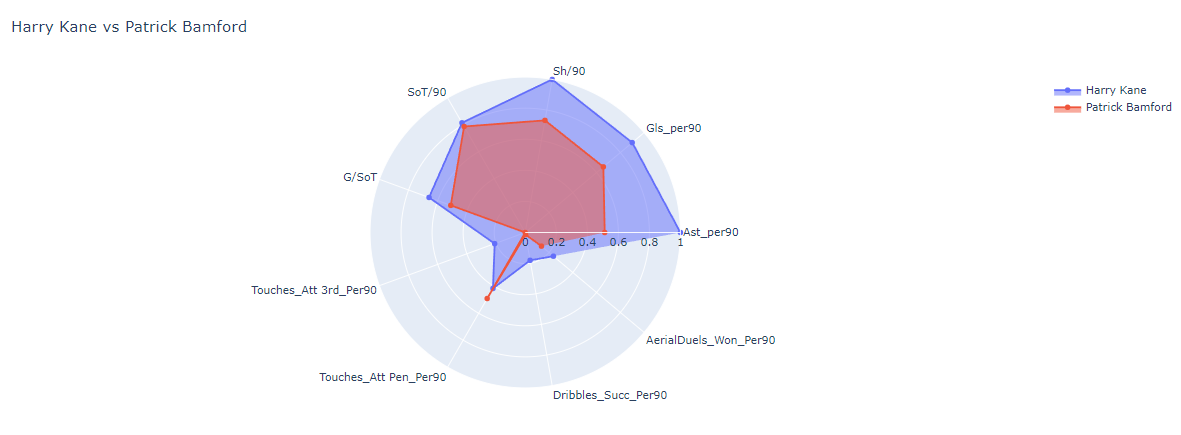

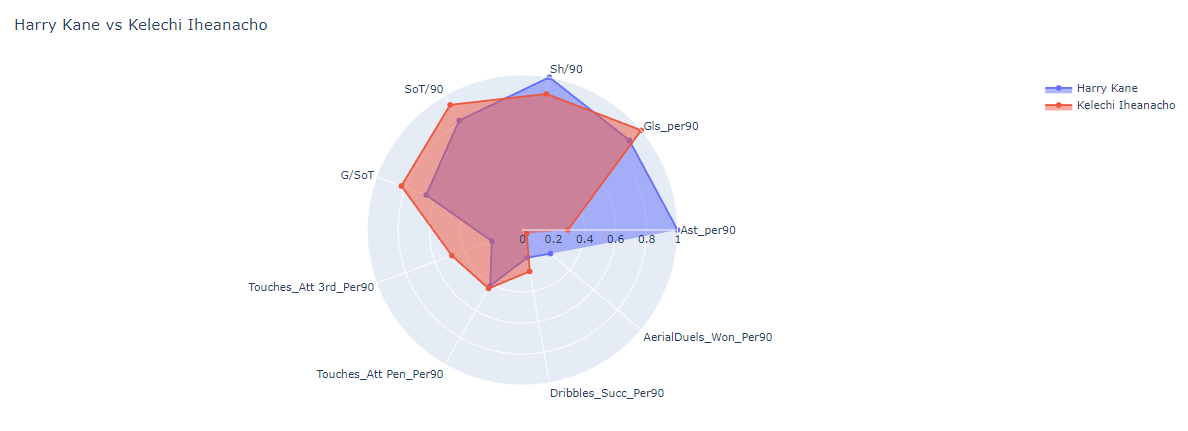

##CONCLUSION


*   From the graphical approach,Patrick Bamford shows similar radar plot shape but lesser statistics to Harry Kane,which implies that if the former increases his stats per game,will show similar attributes to Harry Kane.

*   Using the KNN technique,Patrick Bamford is the most similar player to Harry Kane considering only the 2020/21 season of the Premier League.


###Interesting Fact:

> From the Radar Plot comparisons of the 2020/21 season, Kelechi Iheanacho showed slightly better stats per game than Harry Kane in most attributes considered but with lesser assists per match and aerial duels won per match.



####To conclude from the analysis using both the approaches, Patrick Bamford is the next Harry Kane.





